In [50]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedl', ticks=True, grid=False)

In [65]:
!git pull

remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/cgre-aachen/gempy
   d84d2e7..67ecaa6  hmc_dev    -> origin/hmc_dev
Updating d84d2e7..67ecaa6
Fast-forward
 .../prob/3-HMC-Posterior-Analysis.ipynb            | 1084 ++++++++++++++++++++
 1 file changed, 1084 insertions(+)
 create mode 100644 notebooks/experimental/prob/3-HMC-Posterior-Analysis.ipynb


In [52]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [53]:
with pm.Model() as model:
    mu = pm.Normal('$\mu$', 10, 5)
    sigma = pm.Gamma('$\sigma$', 1, .3)
    y = pm.Normal('$y$', mu, sigma, observed=[7])
    prior = pm.sample_prior_predictive(10000)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5745.86draws/s]
There were 936 divergences after tuning. Increase `target_accept` or reparameterize.
There were 590 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1148 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6724360764382527, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1340 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6367085882652734, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [54]:
with model:
    post = pm.sample_posterior_predictive(trace)


100%|██████████| 40000/40000 [00:17<00:00, 2244.73it/s]


In [55]:
mu

$\mu$

In [56]:
sigma

$\sigma$

In [57]:
y

$y$

In [58]:
import arviz as az

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)
data

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data

In [59]:
data.prior['$\sigma$']

<xarray.DataArray '$\\sigma$' (chain: 1, draw: 10000)>
array([[0.987456, 2.155238, 0.904672, ..., 0.084521, 2.38557 , 0.278509]])
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 9993 9994 9995 9996 9997 9998 9999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45820cc4a8>,
      dtype=object)

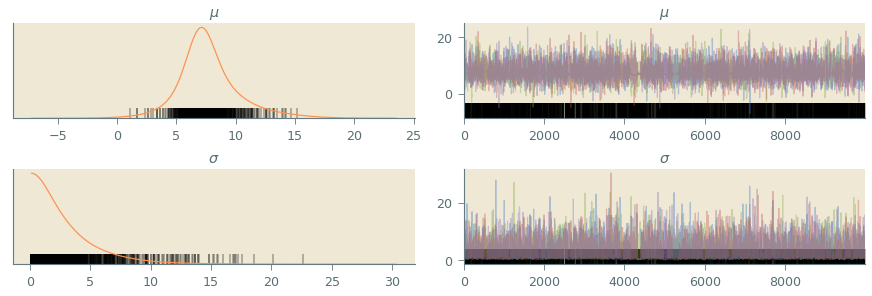

In [60]:
az.plot_trace(data, combined=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f457fbaef60>,
      dtype=object)

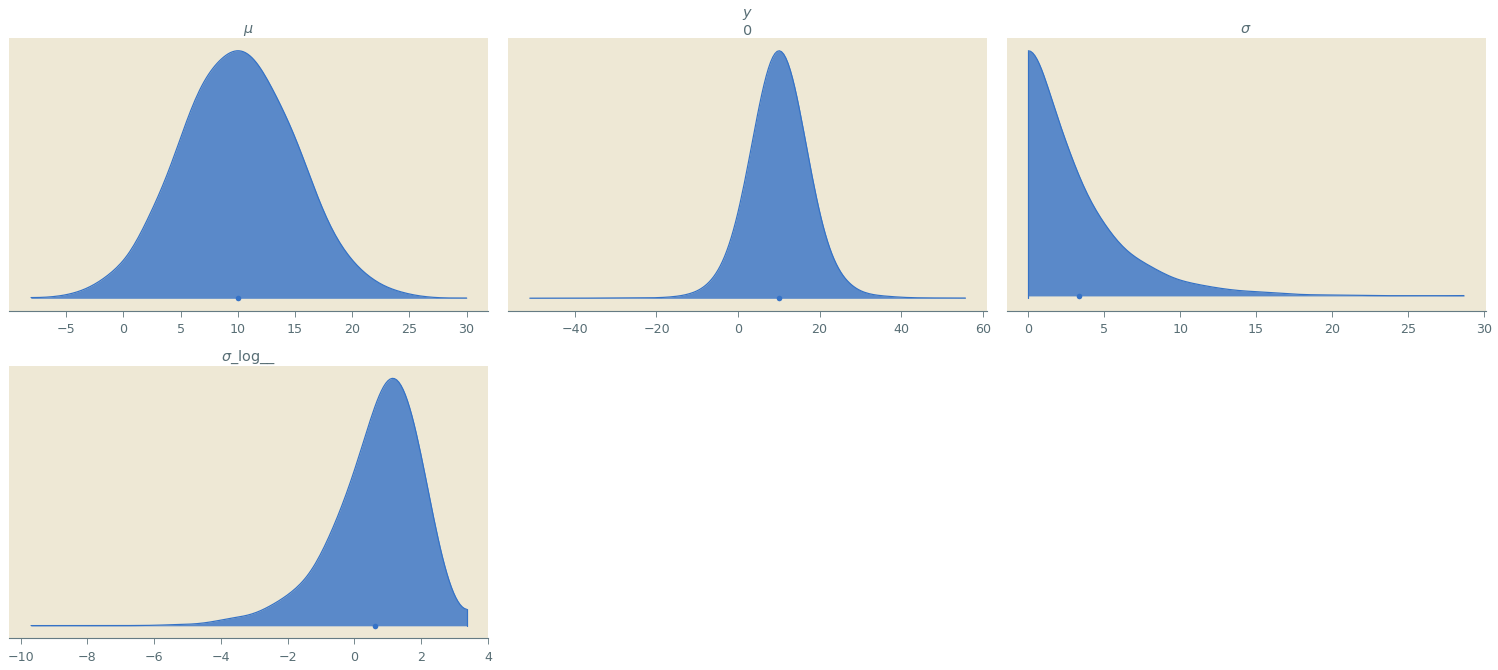

In [61]:
az.plot_density(data, shade=.8, group='prior', credible_interval=1)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f457f973c88>,
      dtype=object)

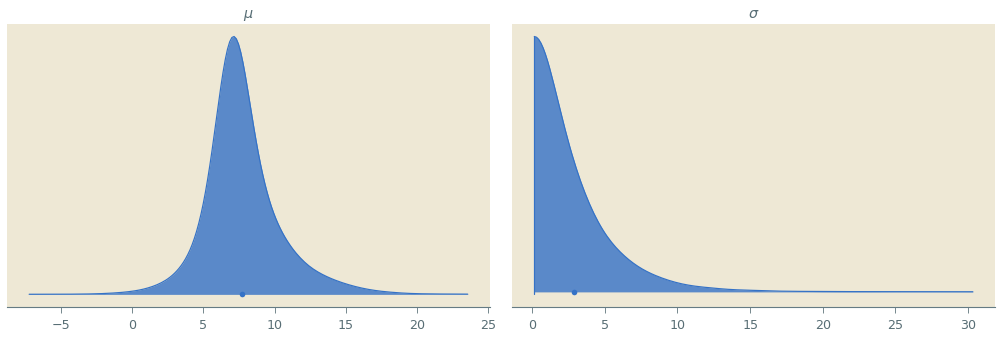

In [62]:
az.plot_density(data, shade=.8, group='posterior', credible_interval=1)


/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/arviz/plots/pairplot.py:159: SyntaxWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or set divergences=False
  SyntaxWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f457f8984a8>,
      dtype=object)

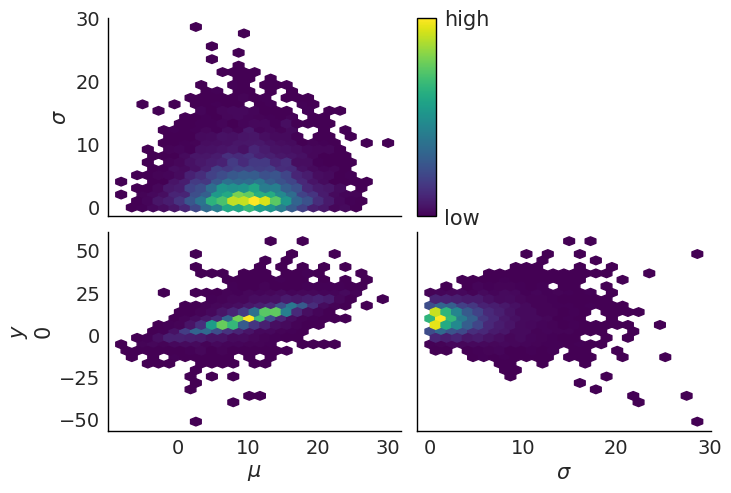

In [63]:
az.style.use('arviz-white')

az.plot_pair(data.prior, divergences=True, var_names=['$\mu$', '$\sigma$', '$y$'], kind='hexbin', contour=True,
            colorbar=True, plot_kwargs={'cmap':'viridis'})

In [64]:
az.plot_joint(data.prior, kind='kde', var_names=['$\mu$', '$\sigma$'], )

SyntaxError: positional argument follows keyword argument (<ipython-input-64-0614144de34e>, line 1)

In [ ]:
az.plot_forest(trace, kind='ridgeplot', combined=True)

In [ ]:
az.plot_ppc(data)